In [1]:
import os, shutil
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF
config = tf.ConfigProto(gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.4))
sess = tf.Session(config=config)
KTF.set_session(sess)

Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
base_dir = './dogImages'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')
train_plus_dir=os.path.join(base_dir, 'train_plus')

# 增强数据集的操作

In [3]:
# if not os.path.exists(train_plus_dir):
#     shutil.copytree(train_dir,train_plus_dir)
# for kind in os.listdir(train_plus_dir):
#     kind_dir=os.path.join(train_plus_dir, kind)
#     if len(os.listdir(kind_dir))*4 < 5*len([x for x in os.listdir(kind_dir) if x.startswith('pic_plus')])+5:
#         continue
#     for pic in os.listdir(kind_dir):
#         pic_dir=os.path.join(kind_dir, pic)
#         if not pic.endswith(".jpg"):
#             continue
#         if pic.startswith('pic_plus'):
#             os.remove(pic_dir)
#             continue
#         print (pic_dir)
#         image = load_img(pic_dir)
#         image = img_to_array(image)
#         image = np.expand_dims(image, axis=0)
#         aug = ImageDataGenerator(rotation_range=30, 
#                                  width_shift_range=0.1,
#                                  height_shift_range=0.1, 
#                                  shear_range=0.1, 
#                                  zoom_range=0.2,
#                                  horizontal_flip=True, 
#                                  fill_mode="nearest")
#         total = 0
#         imageGen = aug.flow(image, batch_size=1, 
#                             save_to_dir=kind_dir,
#                             save_prefix="pic_plus", 
#                             save_format="jpg")
#         print (imageGen)
#         for image in imageGen:
#         # increment our counter
#             total += 1
#             # if we have reached 4 examples, break from the loop
#             if total == 4:
#                 break

In [4]:
train_dir=train_plus_dir

In [5]:
from keras.applications import resnet50

conv_base = resnet50.ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(256, 256, 3))
conv_base.summary()

/home/xiaoming/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 128, 128, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [6]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(133, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 8, 8, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 133)               17432709  
Total params: 41,020,421
Trainable params: 40,967,301
Non-trainable params: 53,120
_________________________________________________________________


In [7]:
#conv_base.trainable = False

In [8]:
from keras import optimizers
# lr: float >= 0. 学习率 Learning rate

# momentum: float >= 0. 参数更新动量 parameter updates momentum

# decay: float >= 0. 学习率每次更新的下降率 Learning rate decay over each update

# nesterov: boolean. 是否应用 Nesterov 动量 whether to apply Nesterov momentum
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-6),
              metrics=['acc'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(256, 256),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(256, 256),
        batch_size=100,
        class_mode='categorical')
validation_generator
print(validation_generator.class_indices)
np.save('labels.npy', validation_generator.class_indices) 

Found 20417 images belonging to 133 classes.
Found 835 images belonging to 133 classes.
{'001.Affenpinscher': 0, '002.Afghan_hound': 1, '003.Airedale_terrier': 2, '004.Akita': 3, '005.Alaskan_malamute': 4, '006.American_eskimo_dog': 5, '007.American_foxhound': 6, '008.American_staffordshire_terrier': 7, '009.American_water_spaniel': 8, '010.Anatolian_shepherd_dog': 9, '011.Australian_cattle_dog': 10, '012.Australian_shepherd': 11, '013.Australian_terrier': 12, '014.Basenji': 13, '015.Basset_hound': 14, '016.Beagle': 15, '017.Bearded_collie': 16, '018.Beauceron': 17, '019.Bedlington_terrier': 18, '020.Belgian_malinois': 19, '021.Belgian_sheepdog': 20, '022.Belgian_tervuren': 21, '023.Bernese_mountain_dog': 22, '024.Bichon_frise': 23, '025.Black_and_tan_coonhound': 24, '026.Black_russian_terrier': 25, '027.Bloodhound': 26, '028.Bluetick_coonhound': 27, '029.Border_collie': 28, '030.Border_terrier': 29, '031.Borzoi': 30, '032.Boston_terrier': 31, '033.Bouvier_des_flandres': 32, '034.Boxer

In [10]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 256, 256, 3)
labels batch shape: (20, 133)


In [11]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from PIL import ImageFile
early_stopping = EarlyStopping(monitor='val_loss',patience=7) 
ImageFile.LOAD_TRUNCATED_IMAGES = True
checkpointer = ModelCheckpoint(filepath='dogskindresnet.model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
history = model.fit_generator(train_generator,
      steps_per_epoch=400,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50, 
      callbacks=[early_stopping,checkpointer], 
      verbose=1)

Epoch 1/100
400/400 [==============================] - 142s 354ms/step - loss: 6.4893 - acc: 0.0151 - val_loss: 5.8483 - val_acc: 0.0229

Epoch 00001: val_loss improved from inf to 5.84834, saving model to dogskindresnet.model.weights.best.hdf5
Epoch 2/100
400/400 [==============================] - 131s 329ms/step - loss: 5.4670 - acc: 0.0479 - val_loss: 4.9366 - val_acc: 0.0694

Epoch 00002: val_loss improved from 5.84834 to 4.93662, saving model to dogskindresnet.model.weights.best.hdf5
Epoch 3/100
400/400 [==============================] - 132s 330ms/step - loss: 4.3984 - acc: 0.1310 - val_loss: 4.2053 - val_acc: 0.1425

Epoch 00003: val_loss improved from 4.93662 to 4.20526, saving model to dogskindresnet.model.weights.best.hdf5
Epoch 4/100
400/400 [==============================] - 132s 329ms/step - loss: 3.5543 - acc: 0.2176 - val_loss: 3.5782 - val_acc: 0.2195

Epoch 00004: val_loss improved from 4.20526 to 3.57820, saving model to dogskindresnet.model.weights.best.hdf5
Epoch 5/


Epoch 00034: val_loss did not improve from 1.12640
Epoch 35/100
400/400 [==============================] - 121s 303ms/step - loss: 0.0353 - acc: 0.9950 - val_loss: 1.1167 - val_acc: 0.6861

Epoch 00035: val_loss improved from 1.12640 to 1.11669, saving model to dogskindresnet.model.weights.best.hdf5
Epoch 36/100
400/400 [==============================] - 122s 305ms/step - loss: 0.0303 - acc: 0.9969 - val_loss: 1.1274 - val_acc: 0.6770

Epoch 00036: val_loss did not improve from 1.11669
Epoch 37/100
400/400 [==============================] - 123s 307ms/step - loss: 0.0257 - acc: 0.9977 - val_loss: 1.1235 - val_acc: 0.6877

Epoch 00037: val_loss did not improve from 1.11669
Epoch 38/100
400/400 [==============================] - 121s 303ms/step - loss: 0.0215 - acc: 0.9987 - val_loss: 1.0960 - val_acc: 0.6883

Epoch 00038: val_loss improved from 1.11669 to 1.09596, saving model to dogskindresnet.model.weights.best.hdf5
Epoch 39/100
400/400 [==============================] - 122s 305ms/s

In [15]:
early_stopping = EarlyStopping(monitor='val_loss',patience=35) 
ImageFile.LOAD_TRUNCATED_IMAGES = True
checkpointer = ModelCheckpoint(filepath='dogskindresnet.model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
history = model.fit_generator(train_generator,
      steps_per_epoch=100,
      epochs=10000,
      validation_data=validation_generator,
      validation_steps=50, 
      callbacks=[early_stopping,checkpointer], 
      verbose=1)

Epoch 1/10000
100/100 [==============================] - 61s 615ms/step - loss: 6.6231e-04 - acc: 1.0000 - val_loss: 1.0412 - val_acc: 0.7358

Epoch 00001: val_loss improved from inf to 1.04116, saving model to dogskindresnet.model.weights.best.hdf5
Epoch 2/10000
100/100 [==============================] - 61s 611ms/step - loss: 5.4980e-04 - acc: 1.0000 - val_loss: 1.0325 - val_acc: 0.7306

Epoch 00002: val_loss improved from 1.04116 to 1.03248, saving model to dogskindresnet.model.weights.best.hdf5
Epoch 3/10000
100/100 [==============================] - 65s 646ms/step - loss: 9.3114e-04 - acc: 0.9995 - val_loss: 1.0369 - val_acc: 0.7363

Epoch 00003: val_loss did not improve from 1.03248
Epoch 4/10000
100/100 [==============================] - 64s 638ms/step - loss: 0.0021 - acc: 0.9995 - val_loss: 1.0167 - val_acc: 0.7343

Epoch 00004: val_loss improved from 1.03248 to 1.01674, saving model to dogskindresnet.model.weights.best.hdf5
Epoch 5/10000
100/100 [=============================

In [26]:
model.load_weights('dogskindresnet.model.weights.best.hdf5')

In [27]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(256, 256),
        batch_size=100,
        class_mode='categorical')

model.evaluate_generator(test_generator,steps=50, max_queue_size=50, workers=1, use_multiprocessing=True, verbose=0)

Found 836 images belonging to 133 classes.


[1.007829131427993, 0.7807692305654542]

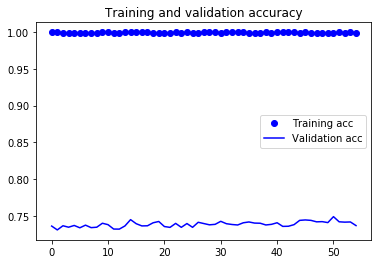

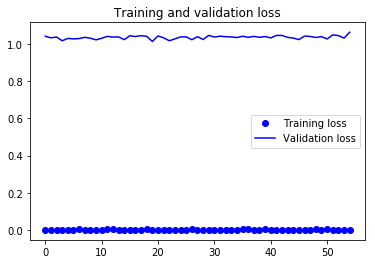

In [29]:
import pandas as pd
from numpy import *
import matplotlib as mpl
mpl.use('agg')
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [30]:
yaml_string = model.to_yaml()
with open('./0.yaml', 'w') as outfile:
    outfile.write(yaml_string)